# Final Capstone Project

## 1. Introduction 

Car accidents are happending all the time in the world. According to WSDOT's (2017) data, a car accident occurs every 4 minutes and a person dies in a car crash every 20 hours in the state of Washington, U.S.A. To help with reduction of car accident cases, this project trys analysing the determinants of an accident and sheds light on predicting the severity with those factors. 

## 2. Data

The data of car accidents which have occurred within the city of Seattle, Washington from the year 2004 to 2020 was used. This data is regarding the severity of each car accidents along with the time and conditions under which each accident occurred. The model aims to predict the severity of an accident with other information provided. All useful features were extracted and and the missing values were handled at first, followed by a creation of a balanced dataset with equal number of two severity type cases. Lately classfication methods such as KNN, random forest and decision tree were used.

### Importing the dataset 

In [254]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl

In [255]:
df = pd.read_csv("Data-Collisions.csv")
df.head()

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [256]:
df.tail()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N


In [257]:
df.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'}, inplace = True)

In [258]:
df.shape

(194673, 38)

In [259]:
df.dtypes

SEVERITYCODE        int64
LONGITUDE         float64
LATITUDE          float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### Feature extraction

In [260]:
#Drop redundant columns, e.g.,
#     LOCATION: Langitude and Latitude have used.
#     SEVERITYCODE.1: duplicated
#Drop columns with codes: OBJECTID, INCKEY, COLDETKEY, REPORTNO,INTKEY,EXCEPTRSNCODE, SDOT_COLCODE, SDOTCOLNUM
#     ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY 
#Drop helpless information: STATUS, EXCEPTRSNDESC, INCDATE , INCDTTM, SDOT_COLDESC, PEDROWNOTGRNT,ST_COLDESC, UNDERINFL--->
#    PEDCYLCOUNT, HITPARKEDCAR, SEVERITYDESC, ADDRTYPE  

df.drop(["LOCATION", "SEVERITYCODE.1", "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INTKEY", 
          "EXCEPTRSNCODE", "SDOT_COLCODE", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY", "SDOTCOLNUM", 
          "STATUS", "EXCEPTRSNDESC", "INCDATE", "INCDTTM", "SDOT_COLDESC", "PEDROWNOTGRNT", "UNDERINFL", 
        "PEDCYLCOUNT", "HITPARKEDCAR", "ST_COLDESC", "SEVERITYDESC", "ADDRTYPE", "COLLISIONTYPE", "PEDCOUNT"], axis=1, inplace = True)
df.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


In [261]:
df.shape

(194673, 11)

In [262]:
df.isna().sum()

SEVERITYCODE           0
LONGITUDE           5334
LATITUDE            5334
PERSONCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
dtype: int64

### Dealing with missing values

In [263]:
#Weather:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [264]:
#Weather is very important, we can't just randomly give a value for each, so I opt to drop those rows with missing values
df.dropna(subset = ["WEATHER"], axis = 0, inplace = True)
df.isna().sum()

SEVERITYCODE           0
LONGITUDE           5178
LATITUDE            5178
PERSONCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6164
INATTENTIONIND    159817
WEATHER                0
ROADCOND              49
LIGHTCOND            211
SPEEDING          180267
dtype: int64

In [265]:
encoding_WEATHER = {"WEATHER": 
                            {"Clear": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Raining": 2,
                             "Overcast": 3,
                             "Snowing": 4,
                             "Fog/Smog/Smoke": 5,
                             "Sleet/Hail/Freezing Rain": 6,
                             "Blowing Sand/Dirt": 7,
                             "Severe Crosswind": 8,
                             "Partly Cloudy": 9}}
df.replace(encoding_WEATHER, inplace=True)
df['WEATHER'].value_counts()

1    127058
2     33145
3     27714
4       907
5       569
6       113
7        56
8        25
9         5
Name: WEATHER, dtype: int64

In [266]:
#Speed:
df['SPEEDING'].value_counts()

Y    9325
Name: SPEEDING, dtype: int64

In [267]:
#Replace NaN with mean value
df['SPEEDING'].replace(np.NaN, "N", inplace=True)

In [268]:
encoding_SPEEDING = {"SPEEDING": 
                            {"Y": 1,
                             "N": 0,
                              }}
df.replace(encoding_SPEEDING, inplace=True)
df['SPEEDING'].value_counts()

0    180267
1      9325
Name: SPEEDING, dtype: int64

In [269]:
#Inattentioned:
df['INATTENTIONIND'].value_counts()

Y    29775
Name: INATTENTIONIND, dtype: int64

In [270]:
df['INATTENTIONIND'].replace(np.NaN, "N", inplace=True)

In [271]:
encoding_INATTENTIONIND = {"INATTENTIONIND": 
                            {"Y": 1,
                             "N": 0,
                              }}
df.replace(encoding_INATTENTIONIND, inplace=True)
df['SPEEDING'].value_counts()

0    180267
1      9325
Name: SPEEDING, dtype: int64

In [272]:
#Light condition:
df['LIGHTCOND'].value_counts()

Daylight                    116095
Dark - Street Lights On      48454
Unknown                      13464
Dusk                          5892
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1193
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [273]:
#Replace NaN with "Unknown"
df['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)

In [274]:
encoding_LIGHTCOND = {"LIGHTCOND": 
                            {"Daylight": 0,
                             "Unknown": 0,
                             "Other": 0,
                             "Dark - Street Lights On": 1,
                             "Dusk": 1,
                             "Dawn": 1,
                             "Dark - No Street Lights": 1,
                             "Dark - Street Lights Off": 1,
                             "Dark - Unknown Lighting": 1,
                              }}
df.replace(encoding_LIGHTCOND, inplace=True)
df['LIGHTCOND'].value_counts()

0    130005
1     59587
Name: LIGHTCOND, dtype: int64

In [275]:
#Road condition:
df['ROADCOND'].value_counts()

Dry               124432
Wet                47450
Unknown            15068
Ice                 1206
Snow/Slush          1002
Other                132
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

In [276]:
#Replace NaN with "Unknown"
df['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)

In [277]:
encoding_ROADCOND = {"ROADCOND": 
                            {"Dry": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Wet": 2,
                             "Ice": 3,
                             "Snow/Slush": 4,
                             "Standing Water": 5,
                             "Sand/Mud/Dirt": 6,
                             "Oil": 7,
                              }}
df.replace(encoding_ROADCOND, inplace=True)
df['ROADCOND'].value_counts()

1    139681
2     47450
3      1206
4      1002
5       115
6        74
7        64
Name: ROADCOND, dtype: int64

In [278]:
#Junction type:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              87001
At Intersection (intersection related)               61296
Mid-Block (but intersection related)                 22375
Driveway Junction                                    10529
At Intersection (but not related to intersection)     2058
Ramp Junction                                          162
Unknown                                                  7
Name: JUNCTIONTYPE, dtype: int64

In [279]:
#Replace NaN with "Unknown"
df['JUNCTIONTYPE'].replace(np.NaN, "Unknown", inplace=True)

In [280]:
encoding_JUNCTIONTYPE = {"JUNCTIONTYPE": 
                            {"Mid-Block (not related to intersection)": 1,
                             "Unknown": 1,
                             "At Intersection (intersection related)": 2,
                             "Mid-Block (but intersection related)": 3,
                             "Driveway Junction": 4,
                             "At Intersection (but not related to intersection)": 5,
                             "Ramp Junction": 6,
                              }}
df.replace(encoding_JUNCTIONTYPE, inplace=True)
df['JUNCTIONTYPE'].value_counts()

1    93172
2    61296
3    22375
4    10529
5     2058
6      162
Name: JUNCTIONTYPE, dtype: int64

In [281]:
avg_LONGITUDE = df["LONGITUDE"].astype("float").mean(axis=0)
print("Average of LONGITUDE:", avg_LONGITUDE)
df['LONGITUDE'].replace(np.NaN, avg_LONGITUDE, inplace=True)

Average of LONGITUDE: -122.33050296319192


In [282]:
avg_LATITUDE = df2["LATITUDE"].astype("float").mean(axis=0)
print("Average of LATITUDE:", avg_LATITUDE)
df['LATITUDE'].replace(np.NaN, avg_LATITUDE, inplace=True)

Average of LATITUDE: 47.619896983890314


In [283]:
df.isnull().sum()

SEVERITYCODE      0
LONGITUDE         0
LATITUDE          0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

### Balancing the dataset

Text(0.5, 1.0, 'Car Accident Severity (Imbalanced)')

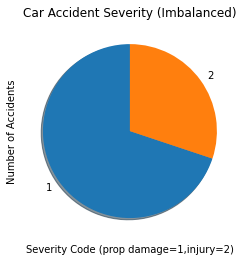

In [284]:
df["SEVERITYCODE"].value_counts().plot(kind='pie',shadow=True, startangle=90)
plt.xlabel('Severity Code (prop damage=1,injury=2)') 
plt.ylabel('Number of Accidents') 
plt.title('Car Accident Severity (Imbalanced)')

In [285]:
# Sorting majority and minority
df_major = df[df["SEVERITYCODE"] == 1]
df_minor = df[df["SEVERITYCODE"] == 2]
df_major.shape

(132488, 11)

In [286]:
#Balancing
df_minor_reform = resample(df_minor,
                                 replace=True,     # sample with replacement
                                 n_samples=132488,    # to match majority class
                                 random_state=250) # reproducible results

#Resampling
df2 = pd.concat([df_major, df_minor_reform])
df2.SEVERITYCODE.value_counts()

2    132488
1    132488
Name: SEVERITYCODE, dtype: int64

In [287]:
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
1,1,-122.347294,47.647172,2,2,1,0,2,2,1,0
2,1,-122.334540,47.607871,4,3,1,0,3,1,0,0
3,1,-122.334803,47.604803,3,3,1,0,1,1,0,0
5,1,-122.387598,47.690575,2,2,2,0,1,1,0,0
6,1,-122.338485,47.618534,2,2,2,0,2,2,0,0


In [288]:
df2.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING'],
      dtype='object')

## 3. Exploratory data analysis

In [289]:
#Installing Folium Package for mapping
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



In [290]:
#VISUALIZE 400 DATA POINTS
limit = 400
df_m1 = df2[["LATITUDE", "LONGITUDE"]]
df_m2 = df_m1.iloc[0:limit, :]

In [291]:
# INCIDENTS IN DF

Seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

incidents = folium.map.FeatureGroup()

#  400 POINTS GROUPING
for lat, lng, in zip(df_m2.LATITUDE, df_m2.LONGITUDE):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='green',
            fill_opacity=0.6
        )
    )

# MAPPING
Seattle_map.add_child(incidents)

In [292]:
# SELECT SEVERITY 2 IN NEW DF
Sev_2 = df2.loc[df2['SEVERITYCODE']==2]
Sev_2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
174606,2,-122.346731,47.523727,2,2,4,0,1,1,0,0
94205,2,-122.289922,47.571582,2,2,2,0,1,1,0,0
64588,2,-122.283443,47.551218,2,2,2,0,3,1,1,0
147241,2,-122.292119,47.558670,3,2,2,0,1,1,0,0
137296,2,-122.326377,47.595131,2,1,2,0,2,2,0,0


### Weather:

In [293]:
Sev_2_w = Sev_2['WEATHER'].value_counts()
Sev_2_w

1    85253
2    25972
3    20313
5      425
4      410
6       55
7       33
8       19
9        8
Name: WEATHER, dtype: int64

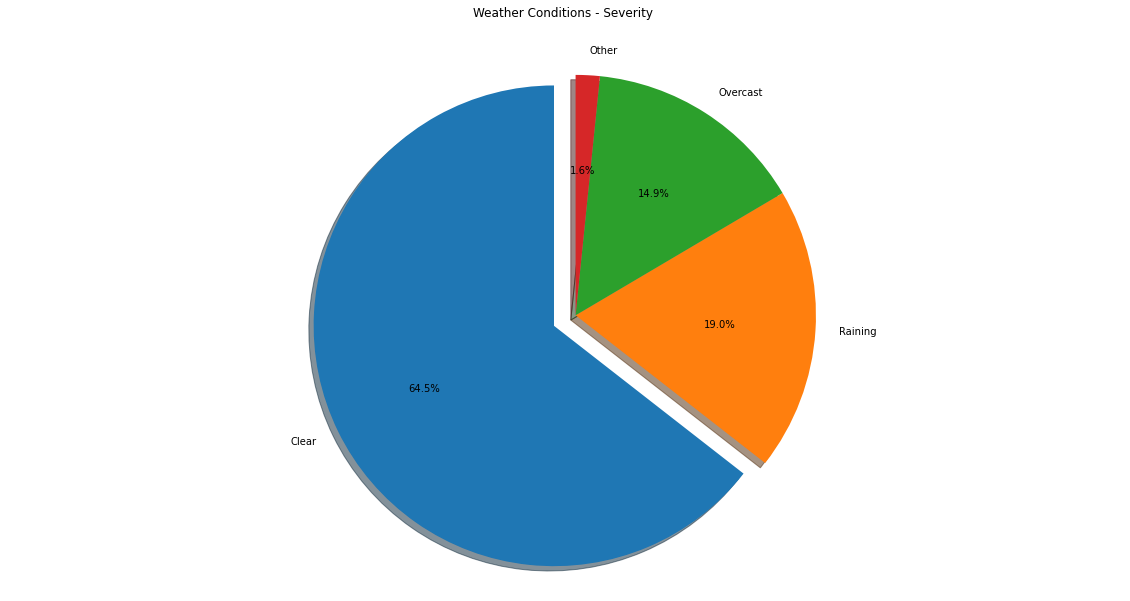

In [294]:
labels = 'Clear', 'Raining', 'Overcast', 'Other'
sizes = [37856, 11176, 8745, sum(Sev_2_w[3:9])]
explode = (0.1,0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Weather Conditions - Severity ', y=1.05)
plt.show()

### Person: 

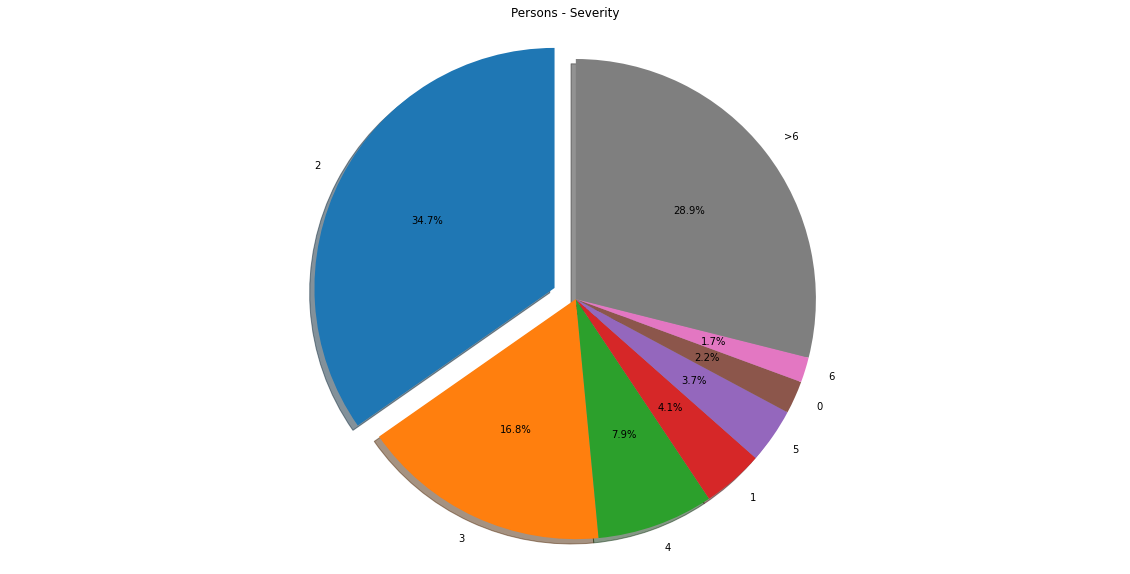

In [295]:
Sev_2_p = Sev_2['PERSONCOUNT'].value_counts()
labels = 2, 3, 4, 1, 5, 0, 6, '>6'
sizes = [27811, 13461, 6295, 3296, 2969, 1762, 1357, sum(Sev_2_p[3:9])]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Persons - Severity', y=1)
plt.show()

### Vehicle:

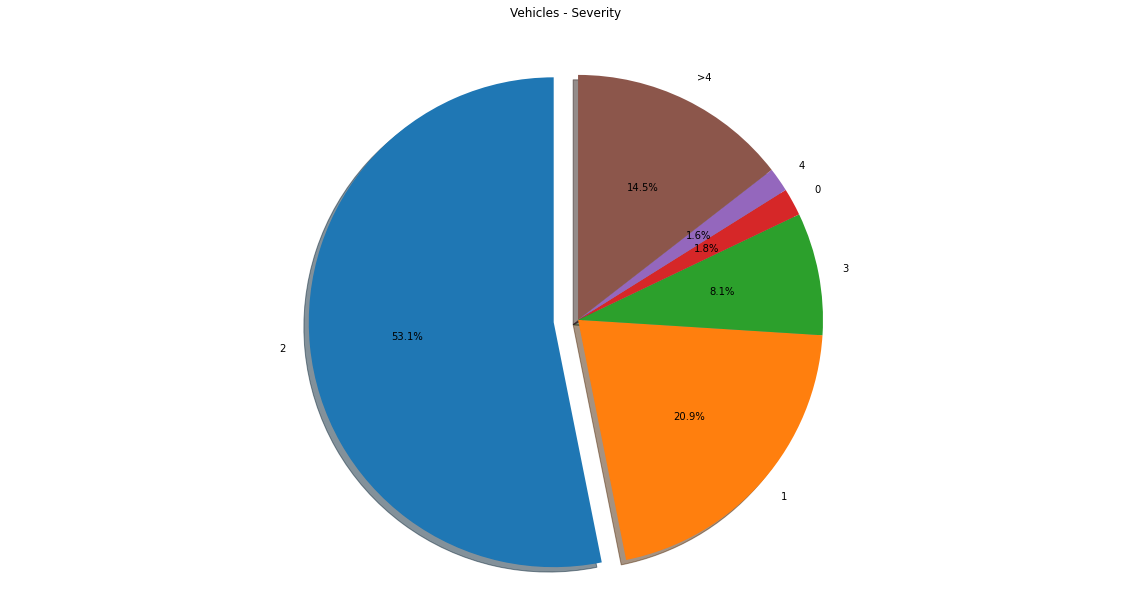

In [296]:
Sev_2_v = Sev_2['VEHCOUNT'].value_counts()
labels = 2, 1, 3, 0, 4,'>4'
sizes = [35949, 14105, 5470, 1227, 1078, sum(Sev_2_p[5:12])]
explode = (0.1, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Vehicles - Severity', y=1.05)
plt.show()

### Junction type:

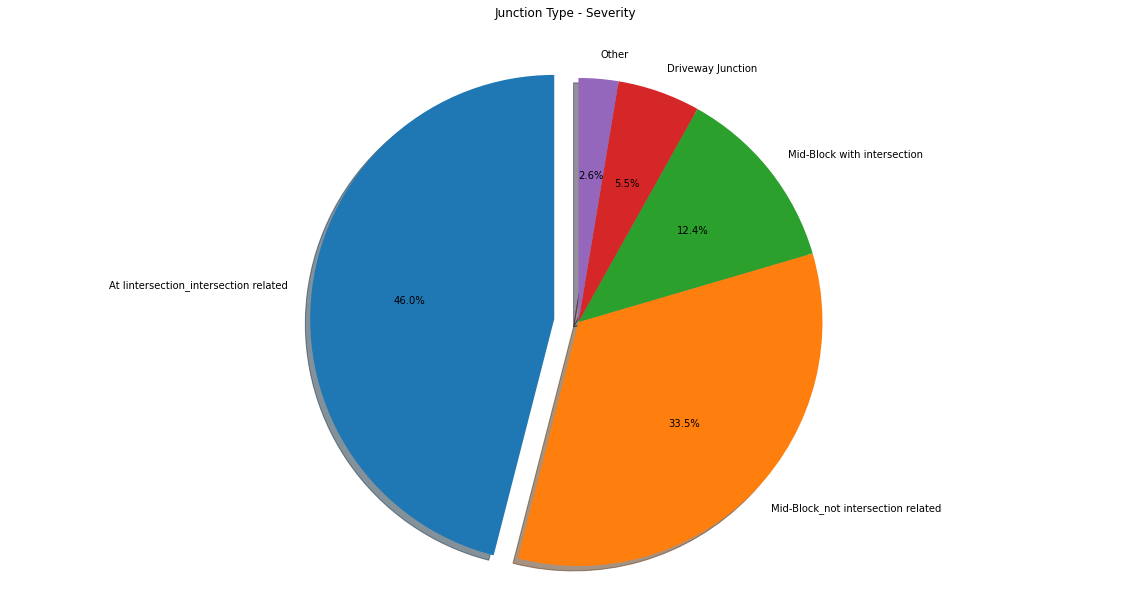

In [297]:
Sev_2_j = Sev_2['JUNCTIONTYPE'].value_counts()
labels = 'At Iintersection_intersection related', 'Mid-Block_not intersection related', 'Mid-Block with intersection', 'Driveway Junction', 'Other'
sizes = [27174, 19806, 7297, 3234, sum(Sev_2_j[4:6])]
explode = (0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Junction Type - Severity', y=1.05)
plt.show()

### Inattentioned: 

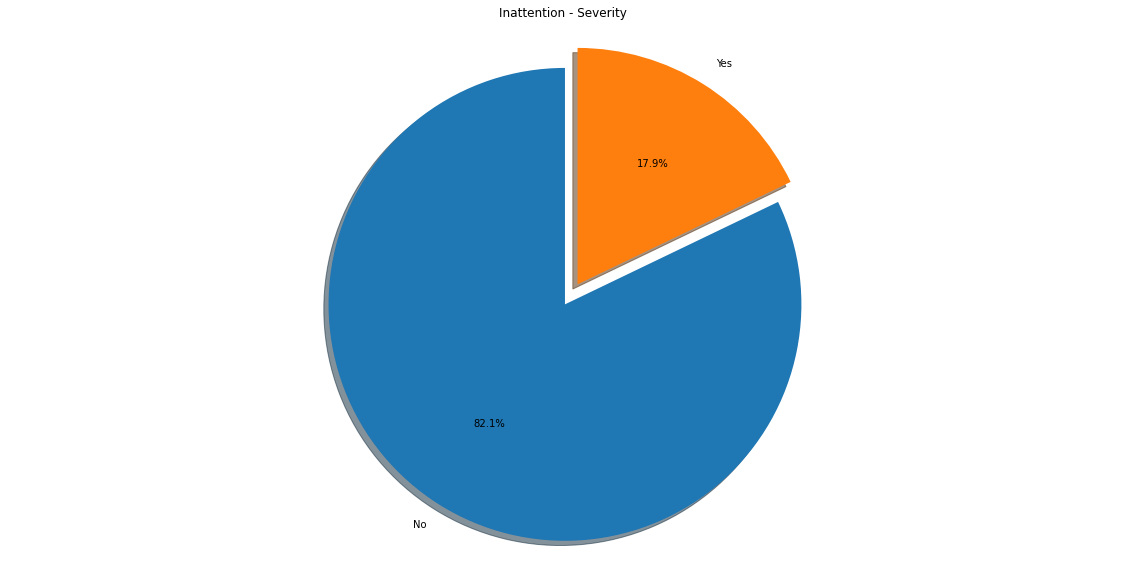

In [298]:
Sev_2_i = Sev_2['INATTENTIONIND'].value_counts()
labels = 'No', 'Yes'
sizes = [47791, 10397]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Inattention - Severity ', y=1)
plt.show()

### Road condition: 

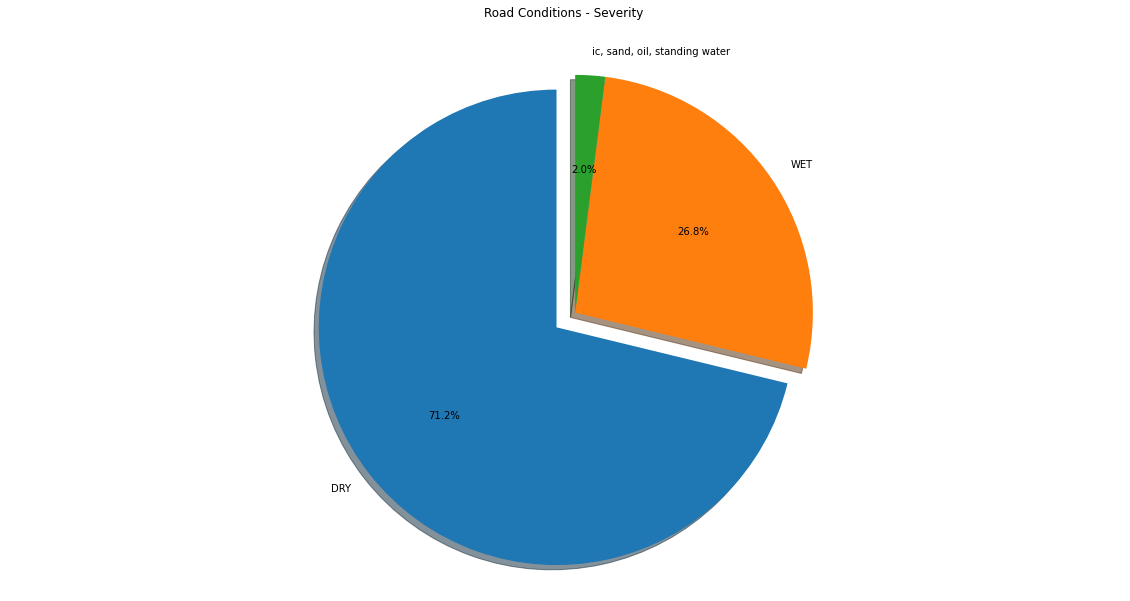

In [299]:
Sev_2_r = Sev_2['ROADCOND'].value_counts()

labels = 'DRY', 'WET', 'ic, sand, oil, standing water'
sizes = [41916, 15755, sum(Sev_2_r[2:7])]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Road Conditions - Severity ', y=1.05)
plt.show()


### Light condition:

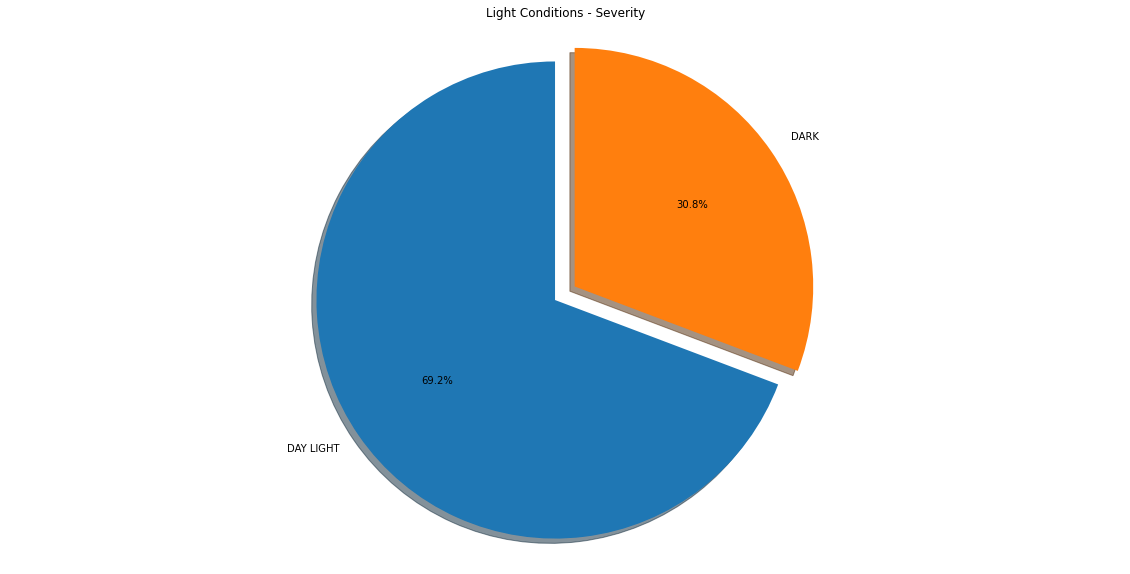

In [300]:
Sev_2_l = Sev_2['LIGHTCOND'].value_counts()
labels = 'DAY LIGHT', 'DARK'
sizes = [40291, 17897]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Light Conditions - Severity', y=1)
plt.show()

### Speed: 

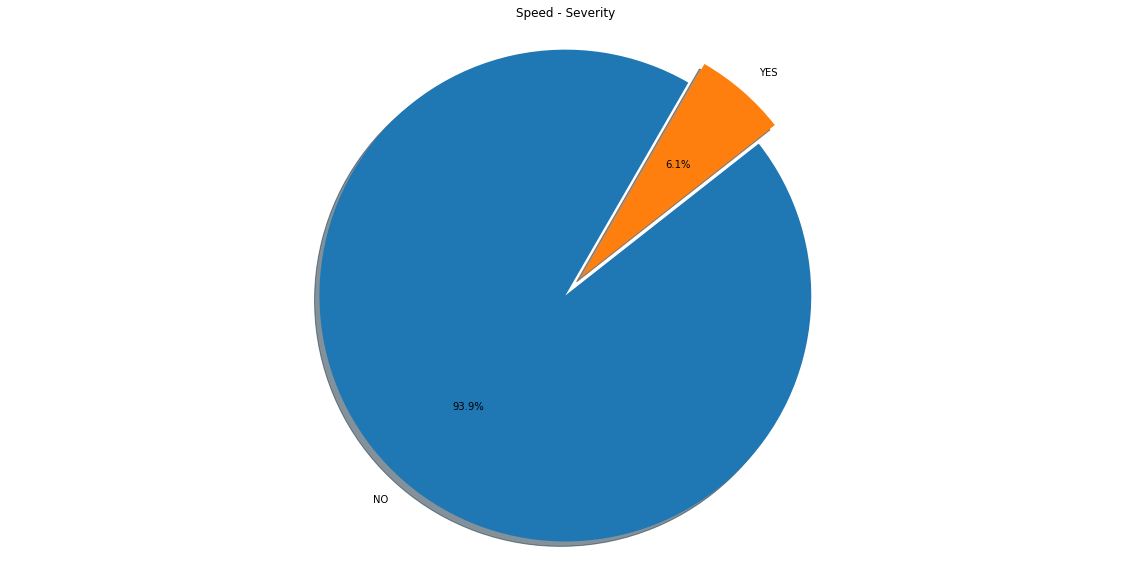

In [301]:
Sev_2_s = Sev_2['SPEEDING'].value_counts()
labels = 'NO', 'YES'
sizes = [54657, 3531]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Speed - Severity', y=1)
plt.show()

## 4. Model development 

In [302]:
#Defining features
Feature = df2[['LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING']]

In [303]:
X = Feature
y = df2['SEVERITYCODE'].values

In [304]:
#Standardization
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.57396601,  0.48614851, -0.37421772,  0.08416229, -0.8799993 ,
        -0.44226666,  0.61678635,  1.36913322,  1.47445294, -0.23647635],
       [-0.14201763, -0.21433656,  1.0327878 ,  1.7318156 , -0.8799993 ,
        -0.44226666,  1.87086149, -0.55751279, -0.67821764, -0.23647635],
       [-0.15093478, -0.26902889,  0.32928504,  1.7318156 , -0.8799993 ,
        -0.44226666, -0.63728879, -0.55751279, -0.67821764, -0.23647635],
       [-1.93893007,  1.25974408, -0.37421772,  0.08416229,  0.19111157,
        -0.44226666, -0.63728879, -0.55751279, -0.67821764, -0.23647635],
       [-0.27560893, -0.02428672, -0.37421772,  0.08416229,  0.19111157,
        -0.44226666,  0.61678635,  1.36913322, -0.67821764, -0.23647635]])

In [305]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (211980, 10) (211980,)
Test set: (52996, 10) (52996,)


### KNN

In [306]:
#Best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    # Training 
    kNNeigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = kNNeigh.predict(X_test)
    
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.79162578, 0.74386746, 0.73796136, 0.7178655 , 0.71331799,
       0.70439278, 0.70352479, 0.6979206 , 0.69710922])

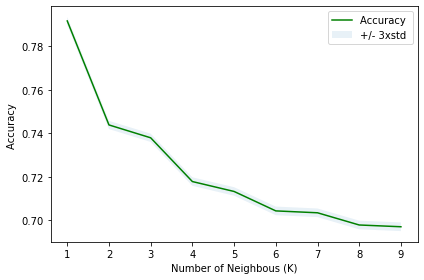

In [307]:
#Plot accuracy with increasing neighbours k
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbous (K)')
plt.tight_layout()
plt.show()

In [308]:
print( "Best k =", mean_acc.argmax()+1)
#Building model with best k == 8
k=1
kNNeigh= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
kNNeigh

Best k = 1


KNeighborsClassifier(n_neighbors=1)

In [309]:
#Evaluation
print("K-Nearest Neighbours Accuray: ", metrics.accuracy_score(y_test, yhat))

K-Nearest Neighbours Accuray:  0.697109215789871


### Decision tree 

In [310]:
#Building model
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [311]:
#Prediction
yhat = DTree.predict(X_test)

In [312]:
#Evaluation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.6671069514680353


### Apply logistic regression 

In [313]:
#Buiding model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [314]:
#Predition
yhat = LR.predict(X_test)

In [315]:
#Evaluation
print("Logistic Regresion's Accuracy: ", metrics.accuracy_score(y_test, yhat))

Logistic Regresion's Accuracy:  0.6315193599516945


###  Random forest 

In [316]:
#Building model
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [317]:
#Prediction
yhat =clf.predict(X_test)

In [318]:
#Evaluation
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, yhat))

Random Forest's Accuracy:  0.8142690014340705


## 5. Model evaluation 

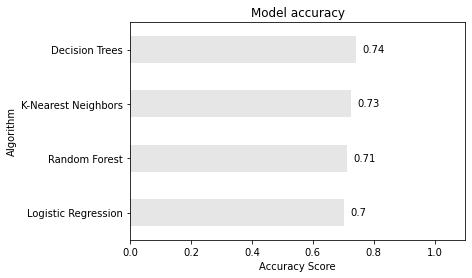

In [319]:
algo_lst =['K-Nearest Neighbors','Decision Trees','Logistic Regression','Random Forest']

accuracy_lst = [0.7267753948889174, 0.7429562090663927, 0.7030949017593425, 0.711878772312829]

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

#Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.9')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Model accuracy')

plt.show()

## 6. Conclusion

Decision tree is the most accurate model among all model been tested in the prediction of car accident severity.

Future work will be feeding more data into the dataset to increase model accuracy. In our case, age was not considered but it could impact on driving and car accident.